# Assessment 2 : Data Processing & Modelling

Prepared by: Ray McGregor

# ADJUSTMENTS

Give more focus on the std deviation of the error results as this gives us a measure of Variance.  Give more of an explanation on BIAS and VARIANCE when describing our results.

Include the actual results with each explanation instead of just referencing the table.

Consider cross correlation between our two key factors as perhaps one reason they are not sufficient.

Do a visualisation of the scatter plot for our key factor.


## Table of Contents

PART ONE : DATA PROCESSING

- Task 1: Read and Clean Data
- Task 2: Correlation of Features and Target Variable
- Task 3: Scatter Plots of Two Features
- Task 4: Histograms of Two Most Correlated Features
- Task 5: Create a Train Test Split

PART TWO : MODELLING

- Task 1: Develop a Linear Regression Model
- Task 2: Run Linear Regression Model With Normalized and Unnormalized Data
- Task 3: Run Linear Regression Model with Only Two Input Features
- Task 4: Compare the results of the Different Approaches



## Introduction

We are exploring trying to predict the age of abalone from physical measurements and the sex of the abalone.  https://edstem.org/au/courses/13941/lessons/42724/slides/293680

The dataset we are using contains a series of abaolone characteristics that we use as our input features as well as the variable we are trying to predict, ring age.
- #Source: https://archive.ics.uci.edu/ml/datasets/abalone

The method we are using to try and predict the age of the abalone is a Linear Regression and the specific model we selected for the task is the LinearRegression model from Scitkit Learn.
- #Source: Scikit Learn. (n.d). Linear Regression Example. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

In making the prediction, we are also exploring various concepts related to the process including:
- obtaining and cleaning the data
- looking at how the input factors in the data are correlated to assist us with feature selection decisions
- creating train and test datasets to allow us to train our model and then test how it operates on unseen data
- exploring the impact of normalising the data
- exploring the results of using a wider range of factors vs the two most highly correlated input factors


Import Libaries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer

import random

import matplotlib.pyplot as plt

import dataframe_image as dfi


# PART ONE: DATA PROCESSING

## Task 1.1 Read and Clean Data

In [2]:
# Read the data from the input file
input_df = pd.read_csv('C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/abalone.data', header=None)
input_df.columns = ["Sex","Length", "Diameter", "Height", "Whole Weight", "Shucked weight", "Viscera Weight", "Shell Weight", "Rings"]

# Task 1: Convert M, F and I to 0, 1 and 
input_df['Sex'] = input_df['Sex'].replace({"M": 0, "F": 1, "I": 2})

In [3]:
# Summary Statistics for our Dataset
input_df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Task 1.2 Correlation Heat Map

### Correlation Matrix

Create a correlation matrix and display the results in tabular format.

In [4]:
corr_matrix = input_df.corr()
corr_matrix

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera Weight,Shell Weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Isolate the correlation levels of the factors with Rings

In [5]:
corr_rings = corr_matrix['Rings'].sort_values(ascending=False)
print('The correlation of Rings with other variables\n')
print(corr_rings[1:])

The correlation of Rings with other variables

Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64


### Create a Heatmap

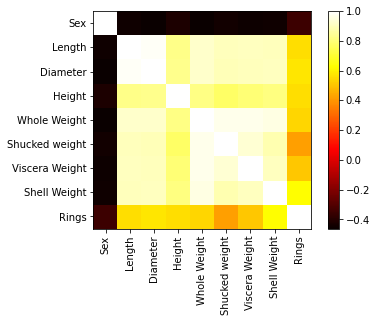

<Figure size 432x288 with 0 Axes>

In [6]:
plt.imshow(corr_matrix, cmap='hot') 
plt.colorbar()
plt.xticks(range(input_df.shape[1]), input_df.columns, rotation=90)
plt.yticks(range(input_df.shape[1]), input_df.columns)

plt.show()
plt.savefig('C:/Dropbox/Variance/UNSW/ZZSC5836/heatmap.png')

### Observations From Correlations

- Sex is negatively correlated with all the other factors, including our target variable Rings.  Sex is the only factor which has negative correlations to any other factor.  This is probably at least partial due to how we coded the Sex (0 for Males, 1 for Females and 2 for Infants).  We would would expect the size and age of the Males and Females to be greater than the Infants and thus the negative correlation.  However, given this level of detail, it is difficult to know what correlation between Ring Age and Male vs Female.  We could obviously explore this though via more detailed analysis and is something would seem worth exploring.

- The factor which is most strongly correlated with our target variable Rings is Shell Weight with a correlation of 0.63.

- All the factors show some level of correlation as even the factor with the lowest level of correlation (Sex) has an absolute correlation level of 0.3518.

- The correlation levels between the Height and Length with Rings is almost identical which may mean they are overlapping factors.  This seems to be supported by the correlation level between them being high at 0.827.

- There is a very strong correlation between several of the factors which is something to consider when modelling our data (relevant for things such as feature selection and feature engineering).  We've displayed those within a dataframe to supplement our heat map. 

## Task 1.3 Scatter Plots

The two factors with highest correlation to Rings are Shell Weight and Diameter.


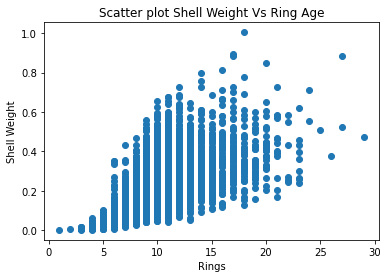

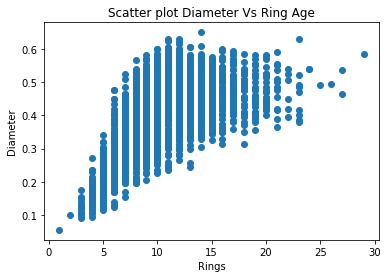

Rings             1.000000
Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64

<Figure size 432x288 with 0 Axes>

In [7]:
print(f"The two factors with highest correlation to Rings are {corr_rings.index[1]} and {corr_rings.index[2]}.")

for i in [1,2]:
    # Create a scatter plot of the two factors with highest correlation to Rings
    plt.scatter(input_df[corr_rings.index[0]], input_df[corr_rings.index[i]])

    plt.title(f"Scatter plot {corr_rings.index[i]} Vs Ring Age")
    plt.xlabel(corr_rings.index[0])
    plt.ylabel(corr_rings.index[i])
    plt.show()
    fname = f"scatter_plot_{str(i)}.png"
    plt.savefig(fname)

corr_rings


### Observations From Scatter Plots

1. Both plots indicate a definite trend of Diameter and Shell Weight increasing as the number of rings increase.  This is consistent with the relatively strong positive numerical correlation value.  Visually, the strength of that relationship is not obviously different between the two factors which again is consistent with the numerical correlation values of (0.63 and 0.57) being relatively close.

2. The scatter plots show signficantly fewer values for Rings > 6 and < 22.5 which is obvious enough to warrant investigation into why this is the case.  Is it something to do with our specific sample, or is it representative of the entire population and for both instances, why?

3.  Most of the 'outliers' shown in the graph appear to be related to the age of the sample item (low number of rings or high number of rings) but consistent with the positive correlation noted.  That is, while there are some 'outliers' in they have a number of rings above 25, or less than 4, the values for those outliers do generally seem to follow the correlation patter for the overall population.  While the impact of outliers should still be considered, the plots shown seem to indicate that the outliers will impact on our models less than other populations with more extreme outliers.

4.  The distribution of the Diameter plot differs in shape from the distribution of the Shell Weight plot.  Distribution shape is important for several reasons, including that it often relevant when applying prediciton models as many of the prediction models make assumptions about the nature of the distribution of the underlying data set.

5.  There is a not a large disparity between the absolute values of the two factors plotted.  That is, the values for both Diameter and Shell Weight are almost all less than one and there are are no negative values.  Contrast this to a population where the maximum of some factors are may be 1 but other 1,000,000.

## Task 1.4 Histograms

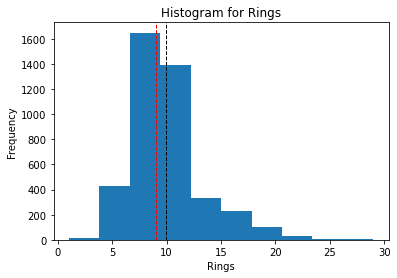

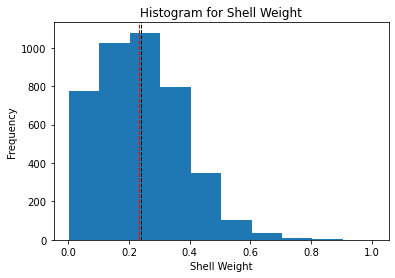

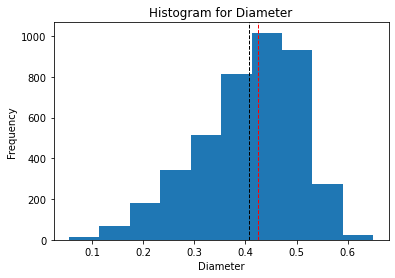

Rings             1.000000
Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Viscera Weight    0.503819
Shucked weight    0.420884
Sex              -0.351822
Name: Rings, dtype: float64

<Figure size 432x288 with 0 Axes>

In [8]:
for i in [0, 1,2]:
    # Create a histogram plot of the two factors with highest correlation to Rings
    plt.hist(input_df[corr_rings.index[i]])

    plt.title(f"Histogram for {corr_rings.index[i]}")
    plt.xlabel(corr_rings.index[i])
    plt.ylabel("Frequency")
    plt.axvline(input_df[corr_rings.index[i]].mean(), color='k', linestyle='dashed', linewidth=1) # Mean
    plt.axvline(input_df[corr_rings.index[i]].median(), color='r', linestyle='dashed', linewidth=1) # Median

    plt.show()
    fname = f"histogram_{str(i)}.png"
    plt.savefig(fname)

corr_rings

### Histogram Observations

1.  The three population values appear to have quite different distribution shapes. None of the three appear to be normally distributed but all three share some characteristics of a normal distribution with the highest frequencies being central to the distribution and then then tailing off to the higher and lower values.  However, the 'tails' of the distribution are not as symmetrical as you would expect to see for a normal distribution.

2.  All three populations show a large percentage of values within relatively narrow range.  This is especially true for Rings and Shell Weight and a little less so for Diameter which does show a more stepped frequency leading up the median frequency.



# Task 1.5 Create a 60/ 40 Train Test Split

In [9]:
def generate_data(source_df, exp_num, test_size = 0.4):

    x_train, x_test = train_test_split(source_df.values[:,:-1], test_size=test_size, random_state=exp_num)
    y_train, y_test = train_test_split(source_df.values[:,-1], test_size=test_size, random_state=exp_num)

    return x_train, x_test, y_train, y_test

In [10]:
## Sample Run of Train Test Split Function
experiment_num = 2
print(f"Experiment Number: {experiment_num}")

# Run Function to generate train and test data: Using all factors and a 60/40 Train Test Split and Not Normalized
x_train, x_test, y_train, y_test = generate_data(input_df, experiment_num, test_size = 0.4)

# Print first record of each set
print('X_train: ', x_train[:1])
print('Y_train: ', y_train[:1])
print('X_test: ', x_test[:1])
print('Y_test: ', y_test[:1]) 

Experiment Number: 2
X_train:  [[0.     0.375  0.28   0.095  0.2225 0.0875 0.043  0.08  ]]
Y_train:  [10.]
X_test:  [[1.     0.46   0.38   0.13   0.639  0.3    0.1525 0.16  ]]
Y_test:  [11.]


# PART TWO : MODELLING

## 2.1 Linear Regression Model

### Define Functions for Performing our Regression Analysis

In [11]:
def scipy_linear_mod(x_train, x_test, y_train, y_test):
    #Source: Scikit Learn. (n.d). Linear Regression Example. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    return rmse_train, r2_train, rmse_test, r2_test, y_pred_test

In [12]:
# Source: Exercise 1.2 Solution
def run_lin_regression_experiments(variation_df, normalization = False): 
 
    # Set Maxiumum Number of Experiments
    max_exp = 30

    # Initilize lists to store results
    rmse_train_list, rsq_train_list = np.zeros(max_exp), np.zeros(max_exp)
    rmse_test_list, rsq_test_list = np.zeros(max_exp), np.zeros(max_exp)
    
    print(f"\nRunning for {max_exp} experiments")
    print(f"Factors: {list(variation_df.columns[:-1])} | Normalization: {normalization}\n")

    for exp_num in range(max_exp):

        #Generate Train Test Using All Factors, Without Normalization
        x_train, x_test, y_train, y_test = generate_data(variation_df, exp_num, test_size = 0.4)

        # normalize training sets if required
        if normalization:
            normalizer = Normalizer()
            x_train = normalizer.fit_transform(x_train)
            x_test = normalizer.transform(x_test)

        # Run OLS Linear Regression Model
        rmse_train, r2_train, rmse_test, r2_test, y_pred_test = scipy_linear_mod(x_train, x_test, y_train, y_test)
        
        rmse_train_list[exp_num], rsq_train_list[exp_num] = rmse_train, r2_train
        rmse_test_list[exp_num], rsq_test_list[exp_num] = rmse_test, r2_test

    # Insert results into lists storing results for EACH experiement
    mean_rmse_train, std_rmse_train = np.mean(rmse_train_list), np.std(rmse_train_list)
    mean_rsq_train, std_rsq_train = np.mean(rsq_train_list), np.std(rsq_train_list)

    mean_rmse_test, std_rmse_test = np.mean(rmse_test_list), np.std(rmse_test_list)
    mean_rsq_test, std_rsq_test = np.mean(rsq_test_list), np.std(rsq_test_list)    

    print("Training RMSE Scores For Each Experiment")
    #print(rmse_train_list)
    print(f"{mean_rmse_train=}, {std_rmse_train=}")

    print("Test RMSE Scores for Each Experiment")
    #print(rmse_test_list)
    print(f"{mean_rmse_test=}, {std_rmse_test=}\n")

    print("Training R2 Scores for Each Experiment")
    #print(rsq_train_list)
    print(f"{mean_rsq_train}=, {std_rsq_train=}")

    print("Test R2 Scores for Each Experiment")
    #print(rsq_test_list)
    print(f"{mean_rsq_test=}, {std_rsq_test=}")
    
    # Create a dictionary of results to give a summary of them in one container
    results_dict = {"mean_rmse_train": mean_rmse_train, "mean_rmse_test": mean_rmse_test, 
                    "std_rmse_train": std_rmse_train, "std_rmse_test": std_rmse_test, 
                    "mean_rsq_train": mean_rsq_train, "mean_rsq_test": mean_rsq_test, 
                    "std_rsq_train": std_rsq_train, "std_rsq_test": std_rsq_test, 
                    "y_pred_test": y_pred_test}
    
    results_array = list(results_dict.values())[:-1] # Will use to create our comparison df

    return results_dict, results_array



## 2.2 All Features, No Normalization

In [13]:
# Run For All Factors, No Normalisation
results_dict, results_array = run_lin_regression_experiments(input_df, normalization = False)

# Create a dataframe from results_array to store the results
comparison_df = pd.DataFrame(data=[results_array], columns = list(results_dict.keys())[:-1])
comparison_df.index = ['All Factors, No Normalization']


Running for 30 experiments
Factors: ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked weight', 'Viscera Weight', 'Shell Weight'] | Normalization: False

Training RMSE Scores For Each Experiment
mean_rmse_train=2.1835120111360715, std_rmse_train=0.03215606520775441
Test RMSE Scores for Each Experiment
mean_rmse_test=2.234785573216999, std_rmse_test=0.0506020902142662

Training R2 Scores for Each Experiment
0.5398883815628942=, std_rsq_train=0.011285295555290413
Test R2 Scores for Each Experiment
mean_rsq_test=0.5204818164392813, std_rsq_test=0.022104630814442073


## Qustion 2.2: All Features, With Normalization

In [14]:
# Run For All Factors, With Normalisation
results_dict, results_array = run_lin_regression_experiments(input_df, normalization = True)
# Add results to comparison df
comparison_df.loc["All Factors, With Normalization", :] = results_array


Running for 30 experiments
Factors: ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked weight', 'Viscera Weight', 'Shell Weight'] | Normalization: True

Training RMSE Scores For Each Experiment
mean_rmse_train=2.153997524918867, std_rmse_train=0.02919840608475373
Test RMSE Scores for Each Experiment
mean_rmse_test=2.184666217489276, std_rmse_test=0.04290735336508189

Training R2 Scores for Each Experiment
0.5522827696005846=, std_rsq_train=0.008413247478358088
Test R2 Scores for Each Experiment
mean_rsq_test=0.5419857466619026, std_rsq_test=0.013262721603074021


## Question 2.3: Two Features, No Normalization

In [15]:
# Run For Two Factors, No Normalisation 2.3
results_dict, results_array = run_lin_regression_experiments(input_df[['Shell Weight', 'Diameter', input_df.columns[-1]]], normalization = False)
# Add Results to Comparison DF
comparison_df.loc["Shell Weight & Diameter, No Normalization", :] = results_array


Running for 30 experiments
Factors: ['Shell Weight', 'Diameter'] | Normalization: False

Training RMSE Scores For Each Experiment
mean_rmse_train=2.502071386076121, std_rmse_train=0.039277266254047434
Test RMSE Scores for Each Experiment
mean_rmse_test=2.5213424998920932, std_rmse_test=0.05951631820582035

Training R2 Scores for Each Experiment
0.39590369914261064=, std_rsq_train=0.012725811835020865
Test R2 Scores for Each Experiment
mean_rsq_test=0.390007883711166, std_rsq_test=0.01906172462987397


## Comparing Results of Different Variations

In [16]:
comparison_display_df = comparison_df.style.format("{:.3f}")
# Create a png file of the dataframe
dfi.export(comparison_display_df, 'comparison_df.png')

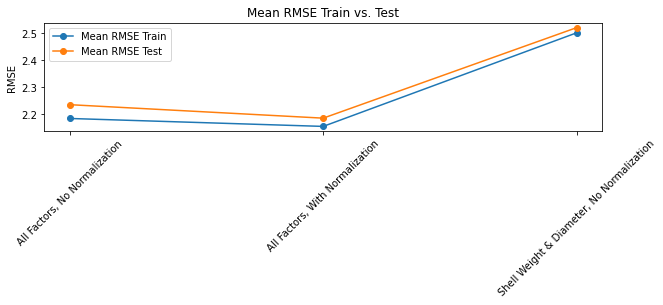

In [28]:
# Plot Mean RMSE Train vs. Test
fig_line_rmse, ax = plt.subplots(figsize=(10,2))

ax.plot(comparison_df.index, comparison_df['mean_rmse_train'], marker='o', label='Mean RMSE Train')
ax.plot(comparison_df.index, comparison_df['mean_rmse_test'], marker='o', label='Mean RMSE Test')
ax.set_xticks(comparison_df.index)  # Setting x-ticks 
ax.set_xticklabels(comparison_df.index, rotation=45)  # Setting x-tick labels
ax.set_title('Mean RMSE Train vs. Test')
ax.set_ylabel('RMSE')
ax.legend()



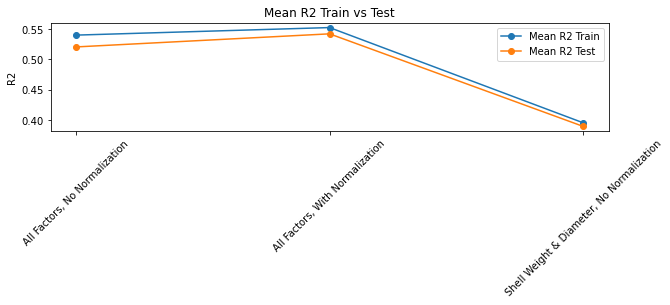

In [27]:
fig_line_r2, ax = plt.subplots(figsize=(10,2))
ax.plot(comparison_df.index, comparison_df['mean_rsq_train'], marker='o', label='Mean R2 Train')
ax.plot(comparison_df.index, comparison_df['mean_rsq_test'], marker='o', label='Mean R2 Test')
ax.set_xticks(comparison_df.index,rotation=45)
ax.set_xticklabels(comparison_df.index, rotation=45)  # Setting x-tick labels
ax.set_title('Mean R2 Train vs Test')
ax.set_ylabel('R2')
ax.legend()
#fig_line_r2.tight_layout()


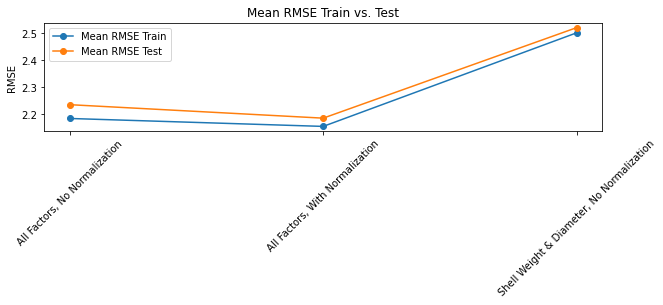

In [30]:
fig_line_rmse

# Comparing Results of Different Approaches Taken

We ran three variations of setup, 30 experiments for each:

- Variation 1: Use all the factors and run our model using un-normalized data.
- Variation 2: Use all the factors and run our model using NORMALIZED data.
- Variation 3. Use ONLY the two factors with the highest correlation to Ring Age (Shell Weight & Diameter) using un-normalized data.

The summary results are displayed in the table labelled "Comparison Table".


In [29]:
# Comparison Table
comparison_display_df

,mean_rmse_train,mean_rmse_test,std_rmse_train,std_rmse_test,mean_rsq_train,mean_rsq_test,std_rsq_train,std_rsq_test
"All Factors, No Normalization",2.184,2.235,0.032,0.051,0.540,0.520,0.011,0.022
"All Factors, With Normalization",2.154,2.185,0.029,0.043,0.552,0.542,0.008,0.013
"Shell Weight & Diameter, No Normalization",2.502,2.521,0.039,0.060,0.396,0.390,0.013,0.019


### Key Observations Regarding the Model and Its Results By Variation

#### Model Performance

For all three variations the model showed some predictive capabilites.  Even for the model which had the lowest R2 score, it had a R2 score of 0.396 and a RMSE score of 2.5.
This means that the model explains 39.6% of the variation in the target variable (age) and the average error in the predictions is 2.194 years.

This is certainly not a perfect score (1 being a perfect score), but it does indicate some predicative capabilities and our model would clearly expect to perform better than a random guess.  The best performing variation (All Factors With Normalisation) given R2 Scores of 0.55 and 0.54 for the train and test sets.  

While the model certainly displayed some predictive capabilities it is certainly is far from perfect with the best Mean R2 score only being 0.552 even on the training set. 

We mentioned in point 1 that the model does not appear to have a major overfitting problem, but it does appear to be underfitting the dataset.  This means the model would probably benefit from having additional meaningful factors added - or that our model is failing to address the nature of the relationship between the factors and the target variable.  For Example, the relationship between the variables may be non-linear in nature whereas the model we used is assuming it is Linear in nature.  

#### Best Performing Variation

Of the three variations, that of using ALL FACTORS and where we DID normalize the data provided the best results.  In fact it provided the best results for all measured metrics.

The summary of the numerical measures comparing the three variations, "Comparison Table", shows the exact values.  However, you can see it produced lower RMSE scores, lower standard deviations and higher R1 scores for both the training and test sets for this variation.

#### Train Vs Test Set Results

For all three variations, the results on the training set were better than the test set, meaning there was some drop off on our model's predictive capabilities when acting on unseen data.  However, that drop off was relatively minor which appears to indicate that the model is not overfitting significantly.  When noting the results were better, they were better for all four metrics measured: Mean RMSE, Standard Deviation of RMSE, Rsquared and Standard Deviation of Rsquared.







#### Number of Factors Used

When using ALL of our factors, instead of only two factors (Shell Weight and Diameter), our model's results improved for all metrics measured factors .

Referring to the first row of our Comparision Table vs the third row:
    - the mean RMSE and standard deviation of the RMSE decreased for both the train and test datasets;
    - the mean R2 score is substantially higher for the datasets using all the factors vs only the two factors.

This improvement was substantial with our Mean R2 score increasing from 0.39 to 0.52 on our unnormalized test datasets and a similar gain on training datasets.  

This improvement appears to indicate that the additional of the other factors IS beneficial in improving the performance of the model.  Both of these finding are to be expected if we assume the additional factors added are meaningful and sufficient data points are present to avoid the model overfitting the additional factors (which appears to be the case).
    
This improvement occurred even though we added additional factors that are not as strong correlated as Shell Weight and Diameter.  This is definitely valuable to know because it is not always the case that simply adding additional factors results in a performance enhancement - soemtimes they do not improve the model or in fact "confuse" the model and result in worse performance.  Additionally, given there are very real costs (including data acquisiton costs, data cleansing costs,  computational costs) of adding additional models, having an indicator of whether the performance is enhanced via the additional factors is valuable.

#### Normalization of Data

Normalization of the data improved our model's results improved, for all metrics measured.
    
Looking at row 1 vs Row2 of the Comparison Table you can see the Mean RMSE, Standard Devation of RMSE both decrease and the R2 increased.  
    
While there was an improvement in our results when we normalized our data, it was not as large as improvement as occurs with some other datasets.  This may be because the raw unnormalized data was already reasonably uniform in its values for most of the factors with all the non-categorical values being between zero and one. The fact that we used a closed-form linear regression model sometimes also reduces the benefits of normalisation somewhat vs iteration driven models which may even fail to converge without normalisation of the underlying data.  However, even with a dataset that is reasonably uniform and a closed-form model we saw performance improvements via normalisation.

#### MODEL RELATED SUMMARY

Our model does have some predictive ability and is performing better than random.  We noted that increasing the number of factors we used did improve our results - as did normalising our data.  However, the predictive capability of our model is far from perfect and it appeas our results would improve if we could add additional meaningful features and/or conduct further feature engineering.  Another alternative to improve our results may be to use a model which can interpret the results betwen the predicative factors better.  